In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
from scipy import stats

In [2]:
# Load monthly GranD dam inflow from SUTD
dfFlowDams = pd.read_hdf('/Users/dlee/gdrive/gpower/data/dfFlowDams.hdf')
ind_dams = np.load('/Users/dlee/gdrive/gpower/data/ind_dams.npz')['ind_dams']
damList = dfFlowDams.columns.values
ndam = dfFlowDams.shape[1]
# Load prediction output files
mp1=[]; mp2=[]; mp3=[]
for i in range(500):
    # Multiple file results
    filn = '/Users/dlee/data/attribute/chtc_out/dfFlowDams{}_swvl_manu.npz'.format(i)
    mp1.extend(np.load(filn,allow_pickle=True)['mp1'].tolist())
    mp2.extend(np.load(filn,allow_pickle=True)['mp2'].tolist())
    mp3.extend(np.load(filn,allow_pickle=True)['mp3'].tolist())

/Users/dlee/anaconda3/envs/dlee_sovi/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LinearRegression from version 0.19.1 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
oni_corr = np.full([12, ndam], np.nan)
oni_lead = oni_corr.copy()
oni_sign = oni_corr.copy()
nao_corr = oni_corr.copy()
nao_lead = oni_corr.copy()
nao_sign = oni_corr.copy()
pdo_corr = oni_corr.copy()
pdo_lead = oni_corr.copy()
pdo_sign = oni_corr.copy()
amo_corr = oni_corr.copy()
amo_lead = oni_corr.copy()
amo_sign = oni_corr.copy()
flow_corr = oni_corr.copy()
flow_sign = oni_corr.copy()
swvl_corr = oni_corr.copy()
swvl_sign = oni_corr.copy()
for i in range(ndam):
    # Data preparation
    for m in range(1, 13):
        # MP1 --------------------- #
        mbox = mp1[i]['m%02d' % m].copy()
        if 'oni' in mbox['maxPred']:
            oni_corr[m-1,i] = mbox['maxcorr'][mbox['maxPred'].index('oni')]
            oni_lead[m-1,i] = mbox['maxlead'][mbox['maxPred'].index('oni')]
            oni_sign[m-1,i] = mbox['maxsign'][mbox['maxPred'].index('oni')]
        if 'nao' in mbox['maxPred']:
            nao_corr[m-1,i] = mbox['maxcorr'][mbox['maxPred'].index('nao')]
            nao_lead[m-1,i] = mbox['maxlead'][mbox['maxPred'].index('nao')]
            nao_sign[m-1,i] = mbox['maxsign'][mbox['maxPred'].index('nao')]
        if 'pdo' in mbox['maxPred']:
            pdo_corr[m-1,i] = mbox['maxcorr'][mbox['maxPred'].index('pdo')]
            pdo_lead[m-1,i] = mbox['maxlead'][mbox['maxPred'].index('pdo')]
            pdo_sign[m-1,i] = mbox['maxsign'][mbox['maxPred'].index('pdo')]
        if 'amo' in mbox['maxPred']:
            amo_corr[m-1,i] = mbox['maxcorr'][mbox['maxPred'].index('amo')]
            amo_lead[m-1,i] = mbox['maxlead'][mbox['maxPred'].index('amo')]
            amo_sign[m-1,i] = mbox['maxsign'][mbox['maxPred'].index('amo')]
        if 'flow' in mbox['maxPred']:
            flow_corr[m-1,i] = mbox['maxcorr'][mbox['maxPred'].index('flow')]
            flow_sign[m-1,i] = mbox['maxsign'][mbox['maxPred'].index('flow')]
        if 'swvl' in mbox['maxPred']:
            swvl_corr[m-1,i] = mbox['maxcorr'][mbox['maxPred'].index('swvl')]
            swvl_sign[m-1,i] = mbox['maxsign'][mbox['maxPred'].index('swvl')]
#         # MP2 --------------------- #
#         mbox = mp2[i]['m%02d' % m].copy()
#         if 'oni' in mbox['maxPred']:
#             oni_corr[m-1+12,i] = mbox['maxcorr'][mbox['maxPred'].index('oni')]
#             oni_lead[m-1+12,i] = mbox['maxlead'][mbox['maxPred'].index('oni')]
#             oni_sign[m-1+12,i] = mbox['maxsign'][mbox['maxPred'].index('oni')]
#         if 'nao' in mbox['maxPred']:
#             nao_corr[m-1+12,i] = mbox['maxcorr'][mbox['maxPred'].index('nao')]
#             nao_lead[m-1+12,i] = mbox['maxlead'][mbox['maxPred'].index('nao')]
#             nao_sign[m-1+12,i] = mbox['maxsign'][mbox['maxPred'].index('nao')]
#         if 'pdo' in mbox['maxPred']:
#             pdo_corr[m-1+12,i] = mbox['maxcorr'][mbox['maxPred'].index('pdo')]
#             pdo_lead[m-1+12,i] = mbox['maxlead'][mbox['maxPred'].index('pdo')]
#             pdo_sign[m-1+12,i] = mbox['maxsign'][mbox['maxPred'].index('pdo')]
#         if 'amo' in mbox['maxPred']:
#             amo_corr[m-1+12,i] = mbox['maxcorr'][mbox['maxPred'].index('amo')]
#             amo_lead[m-1+12,i] = mbox['maxlead'][mbox['maxPred'].index('amo')]
#             amo_sign[m-1+12,i] = mbox['maxsign'][mbox['maxPred'].index('amo')]
#         if 'flow' in mbox['maxPred']:
#             flow_corr[m-1+12,i] = mbox['maxcorr'][mbox['maxPred'].index('flow')]
#             flow_sign[m-1+12,i] = mbox['maxsign'][mbox['maxPred'].index('flow')]
#         if 'swvl' in mbox['maxPred']:
#             swvl_corr[m-1+12,i] = mbox['maxcorr'][mbox['maxPred'].index('swvl')]
#             swvl_sign[m-1+12,i] = mbox['maxsign'][mbox['maxPred'].index('swvl')]
#         # MP3 --------------------- #
#         mbox = mp2[i]['m%02d' % m].copy()
#         if 'oni' in mbox['maxPred']:
#             oni_corr[m-1+24,i] = mbox['maxcorr'][mbox['maxPred'].index('oni')]
#             oni_lead[m-1+24,i] = mbox['maxlead'][mbox['maxPred'].index('oni')]
#             oni_sign[m-1+24,i] = mbox['maxsign'][mbox['maxPred'].index('oni')]
#         if 'nao' in mbox['maxPred']:
#             nao_corr[m-1+24,i] = mbox['maxcorr'][mbox['maxPred'].index('nao')]
#             nao_lead[m-1+24,i] = mbox['maxlead'][mbox['maxPred'].index('nao')]
#             nao_sign[m-1+24,i] = mbox['maxsign'][mbox['maxPred'].index('nao')]
#         if 'pdo' in mbox['maxPred']:
#             pdo_corr[m-1+24,i] = mbox['maxcorr'][mbox['maxPred'].index('pdo')]
#             pdo_lead[m-1+24,i] = mbox['maxlead'][mbox['maxPred'].index('pdo')]
#             pdo_sign[m-1+24,i] = mbox['maxsign'][mbox['maxPred'].index('pdo')]
#         if 'amo' in mbox['maxPred']:
#             amo_corr[m-1+24,i] = mbox['maxcorr'][mbox['maxPred'].index('amo')]
#             amo_lead[m-1+24,i] = mbox['maxlead'][mbox['maxPred'].index('amo')]
#             amo_sign[m-1+24,i] = mbox['maxsign'][mbox['maxPred'].index('amo')]
#         if 'flow' in mbox['maxPred']:
#             flow_corr[m-1+24,i] = mbox['maxcorr'][mbox['maxPred'].index('flow')]
#             flow_sign[m-1+24,i] = mbox['maxsign'][mbox['maxPred'].index('flow')]
#         if 'swvl' in mbox['maxPred']:
#             swvl_corr[m-1+24,i] = mbox['maxcorr'][mbox['maxPred'].index('swvl')]
#             swvl_sign[m-1+24,i] = mbox['maxsign'][mbox['maxPred'].index('swvl')]

In [4]:
swvl_sign[np.isnan(swvl_sign)] = 1
data1 = np.vstack([np.sum(oni_sign == 1, 1),
                  np.sum(nao_sign == 1, 1),
                  np.sum(pdo_sign == 1, 1),
                  np.sum(amo_sign == 1, 1),
                  np.sum(flow_sign == 1, 1),
                  np.sum(swvl_sign == 1, 1),
                  ])
mall = oni_sign+nao_sign+pdo_sign+amo_sign+flow_sign+swvl_sign
mall.mean(1).mean()

1.838198367859385

In [5]:
# Wet seasons & Dry seasons
clim = dfFlowDams.groupby(dfFlowDams.index.month).mean()
clim_order = clim.apply(np.argsort, axis=0)
dry = np.isin(clim_order, np.arange(6))


In [6]:
clim

,6,24,25,27,31,35,37,41,42,44,...,10022,10023,10024,10025,10026,10027,10028,2078,4795,6521
1,1845.718454,315.607777,261.169194,194.988387,69.937282,40.398036,187.462806,244.714538,275.221468,146.035126,...,122.677584,752.946497,1177.700799,60.623560,982.922691,3769.238815,679.069462,28131.755262,190.082655,154.905581
2,1554.213082,310.024326,256.548822,220.060865,72.143012,36.377289,168.804956,290.318565,326.510644,141.797006,...,109.718255,630.947690,1089.591385,45.137569,1007.485504,3234.987280,854.026455,28816.482070,233.382104,239.861710
3,1335.851343,268.366704,222.076644,216.384323,61.658702,43.520536,201.952438,364.386947,409.812638,146.606849,...,74.454561,739.513429,1258.117339,34.657445,1418.495105,3226.305907,1310.605163,29438.176114,293.062667,478.325041
4,1459.134032,263.421804,217.984680,232.900081,47.209976,49.945688,231.767677,506.599065,569.753392,151.626202,...,54.813893,1344.947587,1607.644566,31.413124,1564.197273,4343.896488,1441.891477,30133.131030,296.013962,731.303376
5,4628.864526,260.273995,215.379830,246.376000,33.883366,56.148060,260.549126,589.797967,663.324147,139.023566,...,245.654167,2685.670074,2415.185207,82.242148,1936.388482,7026.671441,1813.930324,30324.527134,327.284726,498.923788
6,5153.027396,215.064121,177.968121,202.066220,24.447568,58.340023,270.720699,662.661659,745.271270,110.928973,...,1602.437865,6239.198848,6611.000134,339.494301,5528.907139,18593.095189,4281.406891,29736.414626,641.541003,586.133548
7,3922.615880,141.781895,117.326206,121.263823,17.986528,57.263371,265.724610,529.180560,595.149972,72.805086,...,1539.175744,8277.286002,11048.095243,539.464373,12003.168985,33575.552088,7428.076722,28757.414438,1677.123007,561.150560
8,3142.293981,82.335861,68.133905,62.864357,13.154789,41.359565,191.924682,266.804718,300.065483,48.582065,...,1293.809959,6746.579190,9758.178375,763.207055,10679.673713,30527.404206,6251.641640,27790.062393,1806.799440,307.902252
9,2959.548724,82.637364,68.383403,57.841755,14.475629,36.404617,168.931768,244.826955,275.347899,70.311905,...,1024.292821,6697.100490,8919.940690,1072.425271,8504.011946,27901.104126,5721.105812,27096.905494,937.111193,503.092515
10,2827.412428,236.127899,195.398649,202.628180,43.183355,63.404151,294.220246,416.211357,468.097651,131.951926,...,755.052046,3813.282585,5046.647659,784.855310,6323.418439,20123.027806,3980.389928,26797.616410,257.114151,404.241130


In [7]:
clim_order

,6,24,25,27,31,35,37,41,42,44,...,10022,10023,10024,10025,10026,10027,10028,2078,4795,6521
1,2,7,7,8,7,1,1,11,11,7,...,3,1,1,3,0,2,0,9,10,0
2,3,8,8,7,8,8,8,0,0,8,...,2,2,0,2,1,1,1,10,11,11
3,1,6,6,6,6,11,11,8,8,6,...,1,0,2,1,11,0,11,8,0,1
4,0,5,5,0,5,0,0,7,7,5,...,0,11,11,0,2,3,2,11,1,7
5,11,9,9,5,4,7,7,1,1,9,...,11,3,3,4,3,11,3,7,9,10
6,10,4,4,9,9,2,2,2,2,4,...,4,10,10,11,4,4,10,0,2,9
7,9,3,3,11,3,3,3,10,10,1,...,10,4,4,10,10,10,4,6,3,2
8,8,2,2,2,2,10,10,9,9,0,...,9,9,9,5,5,5,9,1,4,4
9,7,1,1,1,0,4,4,3,3,2,...,8,5,5,6,9,9,5,2,5,8
10,6,0,0,3,1,6,6,6,6,11,...,7,8,8,7,8,8,8,5,8,6


In [8]:
dry

array([[ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False,  True,  True],
       ...,
       [False,  True,  True, ...,  True, False, False],
       [ True, False, False, ...,  True, False,  True],
       [ True, False, False, ...,  True, False,  True]])

In [12]:

strMon = index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
strVar = ['ENSO','NAO','PDO','AMO','FLOW','SM']
df = pd.DataFrame(data1,index=strVar,columns=strMon)/ndam*100
print(df.head())

# Wet seasons & Dry seasons
clim = dfFlowDams.groupby(dfFlowDams.index.month).mean()
peak = np.argmax(clim.values, axis=0)
clim_order = clim.apply(np.argsort, axis=0)
dry = np.isin(clim_order, np.arange(6))
# ENSO
oni_dry = oni_sign.copy()
oni_dry[dry == False] = 0
oni_dry = np.sum(oni_dry,1).mean()/ndam*200
oni_wet = oni_sign.copy()
oni_wet[dry == True] = 0
oni_wet = np.sum(oni_wet,1).mean()/ndam*200
# NAO
nao_dry = nao_sign.copy()
nao_dry[dry == False] = 0
nao_dry = np.sum(nao_dry,1).mean()/ndam*200
nao_wet = nao_sign.copy()
nao_wet[dry == True] = 0
nao_wet = np.sum(nao_wet,1).mean()/ndam*200
# PDO
pdo_dry = pdo_sign.copy()
pdo_dry[dry == False] = 0
pdo_dry = np.sum(pdo_dry,1).mean()/ndam*200
pdo_wet = pdo_sign.copy()
pdo_wet[dry == True] = 0
pdo_wet = np.sum(pdo_wet,1).mean()/ndam*200
# AMO
amo_dry = amo_sign.copy()
amo_dry[dry == False] = 0
amo_dry = np.sum(amo_dry,1).mean()/ndam*200
amo_wet = amo_sign.copy()
amo_wet[dry == True] = 0
amo_wet = np.sum(amo_wet,1).mean()/ndam*200
# FLOW
flow_dry = flow_sign.copy()
flow_dry[dry == False] = 0
flow_dry = np.sum(flow_dry,1).mean()/ndam*200
flow_wet = flow_sign.copy()
flow_wet[dry == True] = 0
flow_wet = np.sum(flow_wet,1).mean()/ndam*200
# SWVL
swvl_dry = swvl_sign.copy()
swvl_dry[dry == False] = 0
swvl_dry = np.nansum(swvl_dry,1).mean()/ndam*200
swvl_wet = swvl_sign.copy()
swvl_wet[dry == True] = 0
swvl_wet = np.nansum(swvl_wet,1).mean()/ndam*200

            Jan        Feb        Mar        Apr        May        Jun  \
ENSO  25.737602  22.096673  21.971124  24.670433  22.787194  20.464532   
NAO   26.490898  27.997489  28.123038  37.162586  28.625235  33.270559   
PDO   23.917137  20.966729  20.778406  22.347772  23.603264  26.867546   
AMO   16.007533  20.715631  15.881984  16.384181  15.944758  14.124294   
FLOW  83.490270  75.329567  66.415568  70.998117  76.145637  79.472693   

            Jul        Aug        Sep        Oct        Nov        Dec  
ENSO  19.774011  14.940364  18.392969  27.997489  30.947897  25.737602  
NAO   39.359699  35.718770  25.737602  24.231011  23.101067  34.337728  
PDO   27.809165  25.800377  22.284997  21.280603  17.451350  24.795982  
AMO   18.895166  18.832392  19.460138  18.706842  15.128688  25.298180  
FLOW  81.042059  81.858129  82.674200  77.652228  82.172003  79.786566  


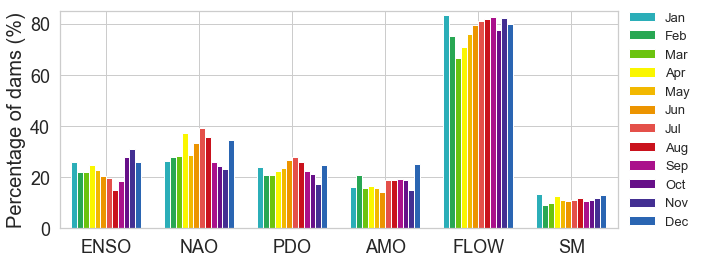

../figures/pdam_correlated.pdf is saved.


In [24]:
import seaborn as sns
clist = ['#2BAEB8', '#28A753', '#6BC30F', '#FAF600', '#F2B800', '#EC9400', 
         '#E4504A', '#C9121D', '#AA118B', '#671089', '#432F92', '#2A65B2']
colorsList = ['lightcoral','crimson', 
              'gold', 
              'lightgreen', 'green',
              'cornflowerblue']
cmap = colors.ListedColormap(clist)

# MultiBar
sns.set(rc={'figure.figsize':(10,4)})
sns.set_style("whitegrid")
ax = df.plot.bar(width=0.75, colormap=cmap)
# # Dry and Wet
if False:
    wid = np.array([-0.45, 0.45])
    ax.plot(wid, np.repeat(oni_dry, 2), '--', color='red')
    ax.plot(wid, np.repeat(oni_wet, 2), '--', color='blue')
    ax.plot(wid+1, np.repeat(nao_dry, 2), '--', color='red')
    ax.plot(wid+1, np.repeat(nao_wet, 2), '--', color='blue')
    ax.plot(wid+2, np.repeat(pdo_dry, 2), '--', color='red')
    ax.plot(wid+2, np.repeat(pdo_wet, 2), '--', color='blue')
    ax.plot(wid+3, np.repeat(amo_dry, 2), '--', color='red')
    ax.plot(wid+3, np.repeat(amo_wet, 2), '--', color='blue')
    ax.plot(wid+4, np.repeat(flow_dry, 2), '--', color='red')
    ax.plot(wid+4, np.repeat(flow_wet, 2), '--', color='blue')
    ax.plot(wid+5, np.repeat(swvl_dry, 2), '--', color='red')
    ax.plot(wid+5, np.repeat(swvl_wet, 2), '--', color='blue')
# Parameters
ax.set_ylim([0,85])
ax.set_xlim([-0.5,5.5])
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylabel('Percentage of dams (%)', fontsize=20)
plt.xticks(range(0,6), df.index, rotation='horizontal')
ax.legend(loc='upper right',bbox_to_anchor=(1.15,1.05), fontsize=13, frameon=False)
plt.tight_layout
# plt.style.use('seaborn')
plt.show()

if True:
    fn_save = '../figures/pdam_correlated.pdf'
    ax.figure.savefig(fn_save, bbox_inches='tight')
    print('%s is saved.' % fn_save)

In [11]:
ax.figure.

SyntaxError: invalid syntax (<ipython-input-11-97e687656d43>, line 1)

In [90]:
oni_corr[oni_sign == 0] = np.nan
nao_corr[nao_sign == 0] = np.nan
amo_corr[amo_sign == 0] = np.nan
pdo_corr[pdo_sign == 0] = np.nan
flow_corr[flow_sign == 0] = np.nan
swvl_corr[swvl_sign == 0] = np.nan
clim = dfFlowDams.groupby(dfFlowDams.index.month).mean()
peak = np.argmax(clim.values, axis=0)
oni_peak = oni_corr[peak-1,range(ndam)]
nao_peak = nao_corr[peak-1,range(ndam)]
amo_peak = amo_corr[peak-1,range(ndam)]
pdo_peak = pdo_corr[peak-1,range(ndam)]
flow_peak = flow_corr[peak-1,range(ndam)]
swvl_peak = swvl_corr[peak-1,range(ndam)]
temp = np.vstack([oni_peak,nao_peak,
                  amo_peak,pdo_peak,
                  flow_peak,swvl_peak]).transpose()
dfPeak = pd.DataFrame(temp,index=dfFlowDams.columns,
                      columns=['oni','nao','amo','pdo','flow','swvl'])
dfPeak.index.name = 'GRAND_ID'
temp = np.vstack([oni_sign.sum(0),
                  nao_sign.sum(0),
                  amo_sign.sum(0),
                  pdo_sign.sum(0),
                  flow_sign.sum(0),
                  swvl_sign.sum(0)]).transpose()
dfMon = pd.DataFrame(temp,index=dfFlowDams.columns,
                      columns=['oni','nao','amo','pdo','flow','swvl'])
dfMon.index.name = 'GRAND_ID'

# Save
if True:
    dfPeak.to_hdf('../data/dfPeak.hdf', 'dfPeak')
    dfMon.to_hdf('../data/dfMon.hdf', 'dfMon')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])